In [1]:
import numpy as np
import util
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile)

seed=229
np.random.seed(seed)

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [3]:
logreg_model = sklearn.linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
print(logreg_model.coef_)
print(logreg_model.intercept_)

[[  1.74976974e-02   3.03317054e-02   1.42935862e-02   3.88325609e-02
    1.03099969e-01  -9.46444214e-01  -6.88203261e-01  -7.09006669e-01
   -9.19474611e-01  -1.39711918e-01   3.84763070e-02   4.72114011e-02
   -2.17960426e-02  -7.58202528e-02  -2.95261844e-02  -1.23503157e-01
    2.57473668e-01  -8.00223332e-02   1.57394678e-01   1.15344990e-01
    1.01694849e-01  -1.68762941e-03  -4.23446768e-02   6.88662710e-02
   -2.18655500e-03   2.57597350e-02  -2.75042021e-03  -2.38493154e-01
   -2.24462877e-02   2.72469792e-02  -4.33162486e-02   4.25604540e-05
   -5.20001554e-02   1.24530159e+00   1.68170091e-01  -6.43127686e-03
    1.35502566e-01   5.08710108e-02   3.57137530e-02   2.76412453e-02
    2.93019394e-03   1.04500977e-02  -1.02540060e-03   1.97004989e-03
   -5.18091063e-03   1.32574143e-03   1.99797750e-03  -2.99416632e-04
   -5.86044390e-03   2.69445245e-03   2.20107960e-03  -5.76092002e-03
   -4.75471880e-03   1.40475827e-02   1.03433432e-02  -1.44449656e-02
   -2.30196698e-02]]

In [5]:
print(util.gini_normalized(y_train, logreg_model.predict_proba(X_train)[:,1]))

0.250139789454


In [6]:
trainsizes, traingini, testgini = util.learning_curves(logreg_model, X_train, X_test, y_train, y_test)
print(traingini)
print('')
print(testgini)
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('Logistic Regression')
plt.legend()
plt.savefig('figures/learning_curves/logisticregression.eps', format='eps', dpi=1000)

Evaluating model on training set size 23808
Evaluating model on training set size 47616
Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.24193805841212596, 0.25164463828922401, 0.23982936160349827, 0.23740865590190208, 0.24195262044709456

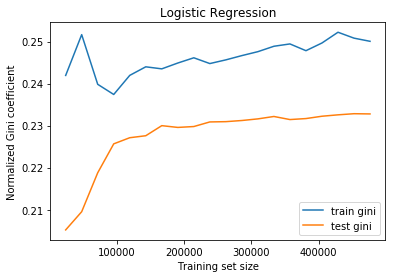

In [7]:
plt.show()

In [8]:
#util.make_prediction(logreg_model, 'data/test.csv', 'predictions/logreg.csv',
                     #lambda X_test: logreg_model.predict_proba(X_test)[:,1])